In [49]:
import numpy as np
import tensornetwork as tn

In [95]:
CX = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0],
])
CX.shape

(4, 4)

In [96]:
CXT = CX.reshape(2, 2, 2, 2)
CXTN = tn.Node(CXT)
CXTN.tensor.shape

(2, 2, 2, 2)

In [102]:
A, S, B, _ = tn.split_node_full_svd(CXTN, [CXTN.edges[0], CXTN.edges[2]], [CXTN.edges[1], CXTN.edges[3]], left_name='A', right_name='B', middle_name='S')
B.tensor = B.tensor * np.sqrt(2)
print(A.tensor.shape, B.tensor.shape)      # (a_in, a_out, internal), (internal, b_in, b_out)

(2, 2, 4) (4, 2, 2)


In [103]:
PA, PS, PB, _ = tn.split_node_full_svd(CXTN, [CXTN.edges[0], CXTN.edges[2]], [CXTN.edges[1], CXTN.edges[3]], left_name="PA", right_name="PB", middle_name="PS")
PB.tensor = PB.tensor * np.sqrt(2)
print(PA.tensor.shape, PB.tensor.shape)     # (a_in, a_out, internal), (internal, b_in, b_out)

(2, 2, 4) (4, 2, 2)


In [104]:
A[1] ^ PA[0]
B[2] ^ PB[1]


Edge('B'[2] -> 'PB'[1] )

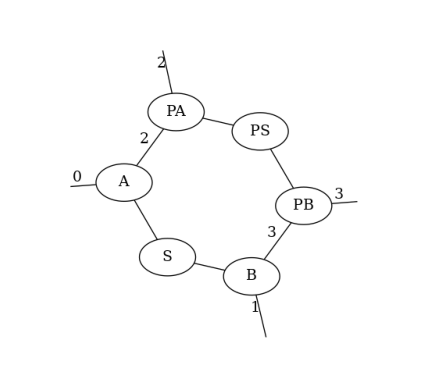

In [105]:
# Display
import matplotlib.pyplot as plt
from tensornetwork.visualization import graphviz
graph = graphviz.to_graphviz([A, PA, S, PS, PB, B])
graph_image = graph.render(format='png', cleanup=True)
plt.imshow(plt.imread(graph_image))
plt.axis('off')
plt.show()

In [106]:
res = tn.contractors.auto([A, PA, S, PS, PB, B], output_edge_order=[A[0], B[1], PA[1], PB[2]])
print(res.tensor.shape)
print(res.tensor.reshape((4, 4)))

(2, 2, 2, 2)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [109]:
I = np.eye(4)
I.reshape((2, 2, 2, 2)).transpose((0, 2, 1, 3)).reshape((4, 4))

array([[1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 1.]])